# Métodos Numéricos (2024)

## Guía 7: Ecuaciones Diferenciales Ordinarias

In [1]:
using Plots
using LaTeXStrings

## Problema 1

Considere el problema de valores iniciales determinado por la Ecuación Diferencial Ordinaria (EDO)

$$
\frac{dy}{dt}(t) = f(t,y(t),p),\;\;\;\;\;\; a\leq t \leq b
$$

y la condición inicial $y(a) = y_0$. Aquí $t$ denota la variable independiente (usualmente representando el tiempo), $y:[a,b]\ni t\to y(t)\in \mathbb{R}^n$ denota una trayectoria o solución de la ecuación (p. ej. la posición de una partícula) y $p$ un vector de parámetros de la EDO (ej. $p_1$ denota la constante gravitatoria, $p_2$ la masa de una partícula, etc.).

Escriba funciones que permitan realizar **un paso de integración** de para una función arbitraria $f$ de acuerdo a los métodos de **Euler**, y Runge Kutta de 2° orden (**RK2**) y Runge Kutta de 4° orden (**RK4**).
Las funciones deben admitir como argumentos: el lado derecho de la EDO $f$, el valor inicial $y_0$, el tiempo inicial $t_0=a$, el paso de integración $h$ (el paso de integración), y el vector de parámetros $p$. 
Cada función debe retornar el valor de la variable luego del paso de integración, es decir una aproximación $w$ a $y(t + h)$.

Escriba otra función que permita hacer integrar de una trayectoria genérica en un intervalo $[a,b]$ arbitrario utilizando un método arbitrario para calcular un paso de integración. Esta función deberá admitir como argumentos, además de las anteriores ($f$, $y_0$, $t_0$ y $p$), la función que realiza un paso de integración.
La función debe retornar dos vectores, uno con los valores $t_i = t_0 + i h$ y otro con los valores aproximados de $w_i \approx y(t_i)$.

**Ayuda:** Dejamos como ejemplo la implementación del método de Euler.

In [2]:
function paso_euler(f,y0,t0,h,p=nothing)
    return (y0 + h*f(y0,t0,p))
end
"""
    dif_euler(f,a,b,y0,h,p)
Calcula la ecuación diferencial dy/dt = `f`(y(t),`t`,`p`) en el intervalo [`a`,`b`], con condiciones iniciales y(`a`)=`y0`, en intervalos de ancho `h`
mediante el método de Euler
"""
function dif_euler(f,a,b,y0,h,p=nothing)
    N = round(Int,(b-a)/h)
    
    vec_w,vec_t=Vector{Float64}(undef,N+1),Vector{Float64}(undef,N+1)
    
    vec_w[1]=y0
    vec_t[1]=a
    
    for i in 2:1:N+1
        vec_t[i]=a+i*h
        vec_w[i]=paso_euler(f,vec_w[i-1],vec_t[i-1],h,p)
    end
    
    return vec_w,vec_t
end
        

dif_euler

In [3]:
function paso_rk2(f,y0,t0,h,p=nothing)
    return y0 + h*f(y0+(h/2)*f(y0,t0,p),t0+h/2,p)
end
"""
    dif_rk2(f,a,b,y0,h,p)
Calcula la ecuación diferencial dy/dt = `f`(y(t),`t`,`p`) en el intervalo [`a`,`b`], con condiciones iniciales y(`a`)=`y0`, en intervalos de ancho `h`
mediante el método de Runge-Kutta de segundo orden
"""
function dif_rk2(f,a,b,y0,h,p=nothing)
    N = round(Int,(b-a)/h)
    
    vec_w,vec_t =Vector{Float64}(undef,N+1),Vector{Float64}(undef,N+1)
    vec_w[1],vec_t[1]=y0,a
    
    for i in 2:1:N+1
        vec_t[i]=a+i*h
        vec_w[i]= paso_rk2(f,vec_w[i-1],vec_t[i-1],h,p) 
    end
    
    return vec_w,vec_t
    
end

dif_rk2

In [4]:
"""
    dif_rk4(f,a,b,y0,h,p)
Calcula la ecuación diferencial dy/dt = `f`(y(t),`t`,`p`) en el intervalo [`a`,`b`], con condiciones iniciales y(`a`)=`y0`, en intervalos de ancho `h`
mediante el método de Runge-Kutta de segundo orden
"""
function dif_rk4(f,a,b,y0,h,p=nothing)
    N = round(Int,(b-a)/h)

    vec_w=Vector{Float64}(undef,N+1)
    vec_t=Vector{Float64}(undef,N+1)

    vec_w[1],vec_t[1]=y0,a

    for i in 2:1:N+1
        vec_t[i]=a+i*h
        
        k1=h*f(vec_w[i-1]        ,   vec_t[i-1]    ,p)
        k2=h*f(vec_w[i-1]+k1/2   ,   vec_t[i-1]+h/2,p)
        k3=h*f(vec_w[i-1]+k2/2   ,   vec_t[i-1]+h/2,p)
        k4=h*f(vec_w[i-1]+k3     ,   vec_t[i]      ,p)
        
        vec_w[i]= vec_w[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6

    end

    return vec_w,vec_t

end

dif_rk4

## Problema 2

Utilizando las funciones del **Problema 1** resuelva con los tres métodos dados en el teórico (Euler, RK2 y RK4) el siguiente problema de valores iniciales:
$$
\frac{dy}{dt}(t) = -y(t)+\sin(2\pi t), \;\;\;\;\;\; 0 \le t \le 1\; , 
\;\;\;\;\; y(0) = 1.0
$$
en el intervalo $0 \le t \le 1$ con un paso de integración $h=0.1$. 

A modo de comparación, grafique la aproximación obtenida y la solución exacta: 

$$
y_e(t)=\Bigl(1+\frac{2\pi}{1+4\pi^2}\Bigr)e^{-t}+\frac{\sin(2\pi t)-2\pi
    \cos(2\pi t)}{1+4\pi^2},
$$

Grafique el error global, $\epsilon(t) = |w(t)-y_e(t)|$ vs $t$.

In [5]:
y(t)=(1+ (2*pi)/(1+4*pi^2))*exp(-t) + (sin(2*pi*t)-2*pi*cos(2*pi*t))/(1+4*pi^2)

y (generic function with 1 method)

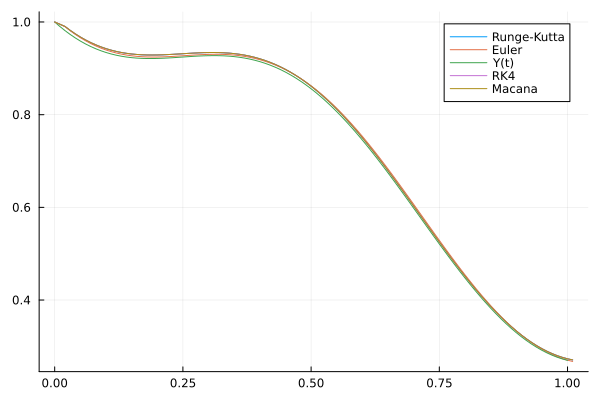

In [21]:
f(y,t,p)=-y + sin(2*pi*t)
ñ(y,t,p)=-y[1]+sin(2*pi*t)

resultado=dif_rk2(f,0,1,1,0.01)
resultado2=dif_euler(f,0,1,1,0.01)
resultado3=dif_rk4(f,0,1,1,0.01)
resultado4=dif_rk4_multi(ñ,0,1,[1],0.01)

plot(resultado[2],resultado[1],label="Runge-Kutta")
plot!(resultado2[2],resultado2[1],label="Euler")
plot!(0:0.01:1,y,label="Y(t)")
plot!(resultado3[2],resultado3[1],label="RK4")
plot!(resultado4[2],resultado4[1],label="Macana")

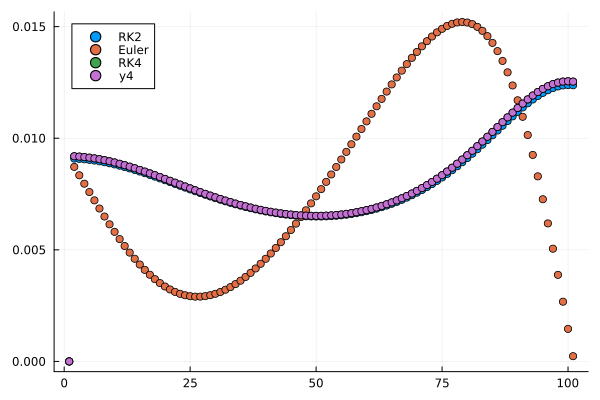

In [22]:
real=y.(resultado[2])
err_rk2=(abs.(real.-resultado[1]))./real
err_eu=(abs.(real.-resultado2[1]))./real
err_rk4=(abs.(real.-resultado3[1]))./real
err_macana=((abs.(real.-resultado4[1]))./real)
scatter(err_rk2,label="RK2")
scatter!(err_eu,label="Euler")
scatter!(err_rk4,label="RK4")
scatter!(err_macana)

In [26]:
e(y,t,p)=y*t
dif_rk4(e,0,10,0,0.1)[1]

101-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

## Problema 3
Considere el problema de valor inicial:
$$
\frac{dy}{dt}(t) = \sin{(y(t))},\;\;\;\;\;\; 0\le t\le 20.0, \;\;\;\;\; y(0)=\alpha
$$
Resuélvalo para los siguientes valores iniciales $\alpha_1=0.5$, $\alpha_2=2.0$, $\alpha_3= \pi$, $\alpha_4=3.6$ $\alpha_5=5.5$ y $\alpha_6=2\pi$, en todos los casos con $h=0.1$.
Para este probolema, utilice sólo el método RK4.
Luego grafique simultáneamente las seis curvas aproximadas a las soluciones de los seis problemas de valores iniciales (no olvide hacer un gráfico de calidad, completo). 
Analice.

In [8]:
F(y,t,p)=sin(y)

fun(a)=dif_rk4(F,0,20,a,0.1)[1]
plot(0:0.1:20,fun(0.5),label=L"$α_1=0.5$",title=L"$y(t)$ : $\frac{dy}{dt}(t) = \sin{(y(t))}$ ",size=(1080,720))
plot!(0:0.1:20,fun(2.0),label=L"$α_2=2.0$")
plot!(0:0.1:20,fun(3.6),label=L"$α_3=3.6$")
plot!(0:0.1:20,fun(5.5),label=L"$α_4=5.5$")
plot!(0:0.1:20,fun(2*pi),label=L"$α_5=2π$")
plot!(-1:0.1:20,x->π,color=:grey,style=:dashdot,label=L"$\pi$")
plot!(-5:0.1:-0.2,x->2*pi,color=:magenta,style=:dash,label=L"$2\pi$",xlim=(-1,20),yticks=sort!(append!([pi,2*pi],-2:1:7)),yaxis=(formatter=yticks))
Plots.text(L"$2\pi$")

Plots.PlotText(L"$2\pi$", Plots.Font("sans-serif", 14, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0)))

In [9]:
?Plots.text

```
text(string, args...; kw...)
```

Create a PlotText object wrapping a string with font info, for plot annotations. `args` and `kw` are passed to `font`.


What the fuck is going on?
 Todas comienzan por puntos diferentes, pero parecen converger a $\pi$.

## Problema 4

Siendo $g$ la acelaración de la gravedad, considere el problema de valores iniciales para la ecuación de la dinámica de un péndulo simple de longitud $l$
\begin{align}
\ddot{\theta}(t) &=& - \frac{g}{l} \sin{(\theta(t))}  \hspace{5cm} (1)
\end{align}
para $\theta(0)=\theta_0$, $\dot{\theta}(0)= \dot{\theta}_0$.
Definiendo  $u= \dot{\theta}$ esta ecuación de segundo orden se puede escribir como un sistema de dos ecuaciones de primer orden
\begin{align}
\dot{\theta}(t) &=& u(t) \hspace{5cm} (2)\\
\dot{u}(t)      &=& - \frac{g}{l} \sin{(\theta(t))}
\end{align}
de condiciones iniciales $(\theta(0),u(0))=(\theta_0,\dot{\theta}_0)$.

Analice numéricamente este sistema de ecuaciones diferenciales ordinarias acopladas para $g=10 m/s^2$ y $l=1 m$. Para ello:

1. Implemente el método RK4 multidimensional.

2. Usando el método anteriormente implementado y paso de integración $h=0.1$, calcule una solución numérica $\theta(t)$ y $u(t)$ vs $t$ del sistema (2) para $0\le t\le 10$ y condiciones iniciales $\theta(0)=0.25$ y $u(0)=0$.

Note que $\sin(\theta) \approx \theta$ para ángulos pequeños. Luego, cuando $0<\theta_0\ll 1$, la ecución diferencial ordinaria (1) puede aproximarse por la del oscilador armónico
\begin{align}
\ddot{\theta}(t) &=& - \frac{g}{l} \theta(t)  \hspace{5cm} (3)
\end{align}
la cual admite solución exacta $\theta_e(t) = \theta_0 \cos(\omega t)$ con $\omega=\sqrt{\frac{g}{l}}$.

3. Calcule una solución numérica aproximada $\theta_a(t)$ y $u_a(t)$ vs $t$ de oscilador armónico usando las mismas condiciones iniciales que para el sistema (2).

4. Calcule y grafique la diferencia $\theta_e(t)-\theta_a(t)$ vs $t$ para visualizar el error de la solución numérica del oscilador armónico. Que observa?

5. Compare todas las soluciones graficando simultaneamente $\theta(t)$, $u(t)$, $\theta_a(t)$, $u_a(t)$, $\theta_e(t)$ y $u_e(t)$ vs $t$.
    
6. Calcule y grafique simultaneamente la energía del sistema $E(t) = K(t) + U(t)$ utilizando:

    a). La energía del sistema original con la solución numérica del sistema original.
    
    b). La energía del sistema original con la solución numérica del oscilador armónico.
    
    c). La energía del oscilador armónico con la solución numérica del oscilador armónico.
    
    d). La energía del oscilador armónico con la solución exacta del oscilador armónico.

    Discuta lo observado.

**Ayuda:** Note que $y,f(t,y)\in \mathbb{R}^2$ donde $y=(y_1,y_2)=(\theta,u)$ y $f(t,y)=(f_1(t,y),f_2(t,y))$ con $f_1(t,y)=y_2$ y $f_2(t,y)=-\frac{g}{l}\sin(y_1)$.

In [14]:
function dif_rk4_multi(f,a,b,y0,h,p=nothing)
    N = round(Int,(b-a)/h)

    vec_w=Array{Float64}(undef,N+1,length(y0))
    vec_t=Vector{Float64}(undef,N+1)
    
    vec_w[1,:]=y0
    vec_t[1]=a

    for i in 2:1:N+1
        vec_t[i]=a+i*h
        
        k1= f(vec_w[i-1,:]            ,   vec_t[i-1]    ,p).*h
        k2= f(vec_w[i-1,:].+(k1./2)   ,   vec_t[i-1]+h/2,p).*h
        k3= f(vec_w[i-1,:].+(k2./2)   ,   vec_t[i-1]+h/2,p).*h
        k4= f(vec_w[i-1,:].+k3        ,   vec_t[i]      ,p).*h
        
        vec_w[i,:]= vec_w[i-1,:] .+ (k1.+(k2.*2).+(k3.*2).+k4) ./ 6

    end

    return vec_w,vec_t

end #Creo que no funca pa verga, o ni entiendo como mierda sacar los datos de esto lol.

dif_rk4_multi (generic function with 2 methods)

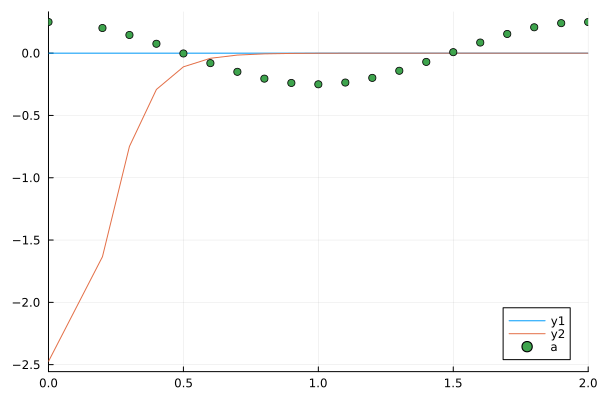

In [32]:
G(u,t,p)=(u[1],-10*sin(u[2]))
θe(t)=0.25*cos(sqrt(10)*t)

p=[10,1]
coeficientes,vec_t=dif_rk4_multi(G,0,10,[0 , -10*sin(0.25)] ,0.1,[10,1])

plot(vec_t,coeficientes[:,1],xlimit=(0,2))
plot!(vec_t,coeficientes[:,2])
scatter!(vec_t,θe.(vec_t),label="a")



## Problema 5

Considere el problema de estudiar la evolución de una epidemia, con el modelo **SIR**.
Sea $S=$ población de individuos susceptibles, $I=$ población de individuos infectados y $R=$ población de individuos recuperados (que tienen inmunidad y no pueden volver a contagiarse).
Entonces las ecuaciones diferenciales asociadas a la evolución temporal de dichas poblaciones son:

\begin{align}
\frac{d S}{d t}(t) &= -\beta S(t) \frac{I(t)}{N}\\
\frac{d I}{d t}(t) &= \beta S(t) \frac{I(t)}{N} - \gamma I(t)\\
\frac{d R}{d t}(t) &= \gamma I(t)
\end{align}

donde $N=S(t)+I(t)+R(t)$ es la población total constante.

1. Considere las condiciones iniciales: $N=1000$, $I_0=10$, $R_0=0$ y los parámetros $\gamma = 0.1$ y  $\beta = 0.5$.
 
2. Utilice el método RK4 implementado en el **problema 4** para resolver este problema entre $t=0$ y $t=200$. 
 
3. Grafique la evolución temporal de las tres poblaciones, $S(t)$, $I(t)$ y $R(t)$ vs $t$ en el intervalo de $t$ calculado.

# Problemas Complementarios

## Problema C.1

La llamada **ecuación logística**
$$
\frac{dN}{dt}(t)= r\,N(t) \left(1-\frac{N(t)}{K}\right)
$$
describe el crecimiento autolimitado de una población dada (suponiendo que no
interactúa con otras especies y que tiene fuentes limitadas de alimentos). Fue
propuesta por Verhulst en 1838 y permite describir al menos cualitativamente
varios fenómenos poblacionales observados en la naturaleza. En esta ecuación
$N(t)$ es el número de individuos de la colonia al tiempo $t$ y $K$ es una
constante positiva.

Una solución $N^*$ se dice estacionaria si se satisface que $dN^*/dt=0$, y por
ende no cambia en el tiempo. Para esta ecuación es fácil verificar que
sólo existen dos soluciones estacionarias: $N_1^*=0$ y $N_2^*=K$.

Determine cuál de las dos soluciones estacionarias es estable y cuál inestable
resolviendo numéricamente la ecuación diferencial con el método
Runge-Kutta de cuarto orden para $r=2$, $K=100$, en el intervalo $0\le t \le 50$
con $h=0.1$ y considerando cinco condiciones iniciales diferentes: a) $N(0)= 0$,
b) $N(0)=2$, c) $N(0)=50$, d) $N(0)= 120$ y d) $N(0)=200$.  Grafique
simultáneamente las cinco soluciones $t$ vs.  $N(t)$ en el intevalo $0\le t\le
50$ en un gráfico completo.

## Problema C.2
Use el método del disparo para resolver los siguientes problemas de 
frontera con una tolerancia de $10^{-5}$. Se da un valor tentativo inicial de $h$ 
y la solución exacta  para comparación.
 
1. $1\leq t\leq 2$, comience con $h=0.5$
$$
\ddot{x}(t)\,=\,-(\dot{x}(t))^2 \,,\;\;\;x(1)=0\;,\;\;x(2)=\ln{(2)} \,.
$$
Solución exacta $x(t)=\ln{(t)}$.

2. $-1\leq t\leq 0$, comience con $h=0.25$
$$
\ddot{x}(t)\,=\,2 x^3(t)\,,\;\;\;x(-1)=\frac{1}{2}\;,\;\;x(0)=\frac{1}{3} \,.
$$
Solución exacta $x=1/(t+3)$.

3. $1\leq t\leq 2$, comience con $h=0.05$
$$
\ddot{x}(t)\,=\,\frac{(t\,\dot{x}(t))^2\,-9 x^2+4 t^6}{t^5},\;\;\;x(1)=0\;,\;\;x(2)=\ln{(256)} \,.
$$
Solución exacta $x(t)=t^3\,\ln{(t)}$.

**Ayuda:** Considere las aproximaciones $x_a(t)$ con $x_a(t_0) = x_0$ y $\dot{x}_a(t_0) = a$. Utilice el método de la bisección para encontrar la raíz de $F(a) := x_a(t_1) - x_1$.

## Problema C.3
**Método de Runge-Kutta de orden 4**

Muestre que la elección dada en el teórico para los pesos $\vec{b}$, los nodos $\vec{c}$ y la matriz $A$ para el método RK4:
\begin{eqnarray}
\vec{b}&=&(1/6,1/3,1/3,1/6) \\
\vec{c}&=&(0,1/2,1/2,1) \\
a_{2,1}&=&1/2 \\
a_{3,2}&=&1/2 \\
a_{4,3}&=&1
\end{eqnarray}
conduce a las ecuaciones RK4 "clásicas" dadas en clase.

## Problema C.4
Considere la siguiente ecuación diferencial
$$
y^{\prime \prime} = \frac{1}{8} \left( 32 + 2 x^3 - y y' \right)    \qquad \qquad \mbox{para }
1 \le x \le 3
$$
de solución $y:x\to y(x)$.
1. Utilice el método RK4 en el intervalo $1 \le x\le 3$ para resolver esta ecuación con las condiciones iniciales $y(1) = 17$, $y'(1) = 0$.
Encuentre, además $y'(3)$.

2. Repita el inciso anterior, pero con las condiciones iniciales $y(1) = 17$, $y'(1) = -40$.

3. Resuelva la misma ecuación diferencial con las condiciones de borde $y(1) = 17$, $y' (3) = 0$ en $N=400$ puntos equiespaciados de $x\in [1,3]$ usando el método de disparo. Para ello, combine el método de la bisección de tolerancia $10^{-10}$ con la información de los incisos anteriores. Grafique la solución $y$ y su derivada $y'$.

## Problema C.5
   
El objeto de este problema es familiarizarse con el uso de una librería para resolver un sistema de ecuaciones diferenciales ordinarias multidimensionales. 
    Para ello les pedimos que reproduzca en su notebook el **ejemplo 2** de esta página: 

    https://docs.sciml.ai/DiffEqDocs/stable/getting_started/
    
Se trata del atractor de Lorenz, un sistema que excibe caos y que es una simplificación *extrema* de un problema de climatología. 

Luego de implementarlo, juegue cambiando las condiciones iniciales y/o parámetros. Cambie los métodos de integración. Esta librería tiene decenas de distintos métodos.

**Nota:** Al comienzo tiene que poner: `using Plots, OrdinaryDiffEq`

In [12]:
# Para instalar el paquete "OrdinaryDiffEq" ejecute (demora un buen rato):
import Pkg
Pkg.add("OrdinaryDiffEq")

LoadError: IOError: could not spawn setenv(`7z.exe x 'C:\Users\CuteSeal\.julia\registries\General.tar.gz' -so`,["WINDIR=C:\\WINDOWS", "PATH=C:\\Users\\CuteSeal\\.julia\\juliaup\\julia-1.10.2+0.x64.w64.mingw32\\bin\\..\\lib\\julia;C:\\Users\\CuteSeal\\.julia\\juliaup\\julia-1.10.2+0.x64.w64.mingw32\\bin\\..\\lib;C:\\Users\\CuteSeal\\.julia\\conda\\3\\x86_64\\Library\\bin;C:\\Users\\CuteSeal\\.julia\\conda\\3\\x86_64\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\java8path;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files\\Eclipse Adoptium\\jdk-17.0.7.7-hotspot\\bin;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Program Files\\dotnet\\;C:\\Program Files\\Git\\cmd;C:\\Users\\CuteSeal\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Users\\CuteSeal\\.dotnet\\tools;C:\\Users\\CuteSeal\\AppData\\Local\\Programs\\Microsoft VS Code\\bin", "USERDOMAIN_ROAMINGPROFILE=SEAL", "JPY_INTERRUPT_EVENT=2940", "LOCALAPPDATA=C:\\Users\\CuteSeal\\AppData\\Local", "HOMEPATH=\\Users\\CuteSeal", "PROCESSOR_IDENTIFIER=AMD64 Family 23 Model 113 Stepping 0, AuthenticAMD", "NUMBER_OF_PROCESSORS=12", "PATHEXT=.COM;.EXE;.BAT;.CMD;.VBS;.VBE;.JS;.JSE;.WSF;.WSH;.MSC;.CPL", "SESSIONNAME=Console", "SYSTEMROOT=C:\\WINDOWS", "APPDATA=C:\\Users\\CuteSeal\\AppData\\Roaming", "PSMODULEPATH=C:\\Users\\CuteSeal\\Documents\\WindowsPowerShell\\Modules;C:\\Program Files\\WindowsPowerShell\\Modules;C:\\WINDOWS\\system32\\WindowsPowerShell\\v1.0\\Modules", "COMMONPROGRAMW6432=C:\\Program Files\\Common Files", "PROGRAMDATA=C:\\ProgramData", "PUBLIC=C:\\Users\\Public", "USERDOMAIN=SEAL", "OS=Windows_NT", "PROCESSOR_REVISION=7100", "TMP=C:\\Users\\CuteSeal\\AppData\\Local\\Temp", "FONTCONFIG_FILE=C:\\Users\\CuteSeal\\.julia\\artifacts\\c916a560fa109a4db3d6938a8ab1a6a8b4a09731\\etc\\fonts\\fonts.conf", "COMMONPROGRAMFILES(X86)=C:\\Program Files (x86)\\Common Files", "COMSPEC=C:\\WINDOWS\\system32\\cmd.exe", "OPENBLAS_DEFAULT_NUM_THREADS=1", "EFC_8020=1", "VBOX_MSI_INSTALL_PATH=C:\\Program Files\\Oracle\\VirtualBox\\", "ALLUSERSPROFILE=C:\\ProgramData", "AMDRMPATH=C:\\Program Files\\AMD\\RyzenMaster\\", "COMMONPROGRAMFILES=C:\\Program Files\\Common Files", "COMPUTERNAME=SEAL", "JAVA_HOME=C:\\Program Files\\Eclipse Adoptium\\jdk-17.0.7.7-hotspot\\", "ONEDRIVE=C:\\Users\\CuteSeal\\OneDrive", "GRDIR=C:\\Users\\CuteSeal\\.julia\\artifacts\\590afc16456a73f96f235c307b394870eb674c2a", "USERNAME=CuteSeal", "JPY_SESSION_NAME=C:\\Users\\CuteSeal\\Desktop\\Julia\\Metodos-2024\\Guia7\\guia-7-2024.ipynb", "COLUMNS=80", "IPY_INTERRUPT_EVENT=2940", "PROGRAMFILES(X86)=C:\\Program Files (x86)", "PROGRAMFILES=C:\\Program Files", "JPY_PARENT_PID=3052", "CONDARC=C:\\Users\\CuteSeal\\.julia\\conda\\3\\x86_64\\condarc-julia.yml", "LOGONSERVER=\\\\SEAL", "USERPROFILE=C:\\Users\\CuteSeal", "DRIVERDATA=C:\\Windows\\System32\\Drivers\\DriverData", "FONTCONFIG_PATH=C:\\Users\\CuteSeal\\.julia\\artifacts\\c916a560fa109a4db3d6938a8ab1a6a8b4a09731\\etc\\fonts", "CONDA_PREFIX=C:\\Users\\CuteSeal\\.julia\\conda\\3\\x86_64", "FPS_BROWSER_USER_PROFILE_STRING=Default", "PROCESSOR_LEVEL=23", "SYSTEMDRIVE=C:", "LINES=30", "FPS_BROWSER_APP_PROFILE_STRING=Internet Explorer", "PROGRAMW6432=C:\\Program Files", "TEMP=C:\\Users\\CuteSeal\\AppData\\Local\\Temp", "HOMEDRIVE=C:", "OPENBLAS_MAIN_FREE=1", "PROCESSOR_ARCHITECTURE=AMD64", "PYTHONIOENCODING=UTF-8"]): no such file or directory (ENOENT)

In [13]:
using OrdinaryDiffEq

LoadError: ArgumentError: Package OrdinaryDiffEq not found in current path.
- Run `import Pkg; Pkg.add("OrdinaryDiffEq")` to install the OrdinaryDiffEq package.